- The kNN classifier consists of two stages:
***
- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated
- In this exercise you will implement these steps and understand the basic Image Classification pipeline and gain proficiency in writing efficient, vectorized code.
***
- We will work with the handwritten digits dataset. Images will be flattened (8x8 sized image -> 64 sized vector) and treated as vectors.
***

***
- Кнн классификатор состоит из двух этапов
***
- Во время обучения классификатор берет обучающие данные и просто запоминает их
- Во время тестирования кнн классифицирует каждую тестовую картику сравнивая ее со всеми обучающими картинками и передает k-метки, которые более похожие на обучающие примеры
- Значение k проходит перекрестную проверку (cross-validated)
- В этом упражнении вы выполните эти шаги и поймете этот базовый конвеер классификации картинок (Image Classification pipeline) и получите навыки в написании эффективного векторизиованного кода
***
- Вы выполните работу с базой данных с рукописными цифрами (handwritten digits dataset). Картинки будут сглаженны (размер картинки 8x8 -> ветор размера 64) и обработанны как векторы.

In [4]:
from sklearn import datasets #импортируем функцию для баззы данных
dataset = datasets.load_digits() #загружаем базу данных в переменную
print(dataset.DESCR) #выводим описание базы данных
print(dataset.keys()) #заголовки

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
# First 100 images will be used for testing. This dataset is not sorted by the labels, so it's ok
# to do the split this way.
# Please be careful when you split your data into train and test in general.
#
#Первые 100 картинок будут использоваться для тестирования. Эта база данных не отсортированна по меткам
#так что это ок сделать разбиение таким путем
#Пожалуйста будьте осторожны, когда разделяете ваши данные на обучающие и тестриуемые, в целом

test_border = 100 #кол-во картинок для тестирования
X_train, y_train = dataset.data[test_border:], dataset.target[test_border:] #для обучения, без теструемых данных,  цифра - массив, цифра - цифра
X_test, y_test = dataset.data[:test_border], dataset.target[:test_border] #для тестироования, цифра - массив, цифра - цифра  

print('Training data shape: ', X_train.shape) #размер массива обучающих данных
print('Training labels shape: ', y_train.shape) #размер массива с обучающими данными с метками(цифра-цифра)
print('Test data shape: ', X_test.shape) #размер массива тестируемых данных
print('Test labels shape: ', y_test.shape) #размер массива с тестируемыми данными с метками(цифра-цифра)
num_test = X_test.shape[0] ##размер массива тестируемых данных
#print(num_test)

Training data shape:  (1697, 64)
Training labels shape:  (1697,)
Test data shape:  (100, 64)
Test labels shape:  (100,)


In [6]:
# Run some setup code for this notebook.
#
#запутите установочный код для этого блокнота

import random 
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
#
#немного волшебства, чтобы matplotlib изображдал фигуры в блокноте, а не в новом окне

%matplotlib inline 
#указывает, что график необходимо построить в оболочке Jupyter, но теперь он выводится как обычная картинка

plt.rcParams['figure.figsize'] = (14.0, 12.0) # set default size of plots ----- устанавливает стандартные размеры полотна
plt.rcParams['image.interpolation'] = 'nearest' #интерполяция - ближайший
plt.rcParams['image.cmap'] = 'gray' #цвет изображения - серый

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
#
#еще немного магии, чтобы блокнот перезагрузил внешние модули питона
%load_ext autoreload
%autoreload 2

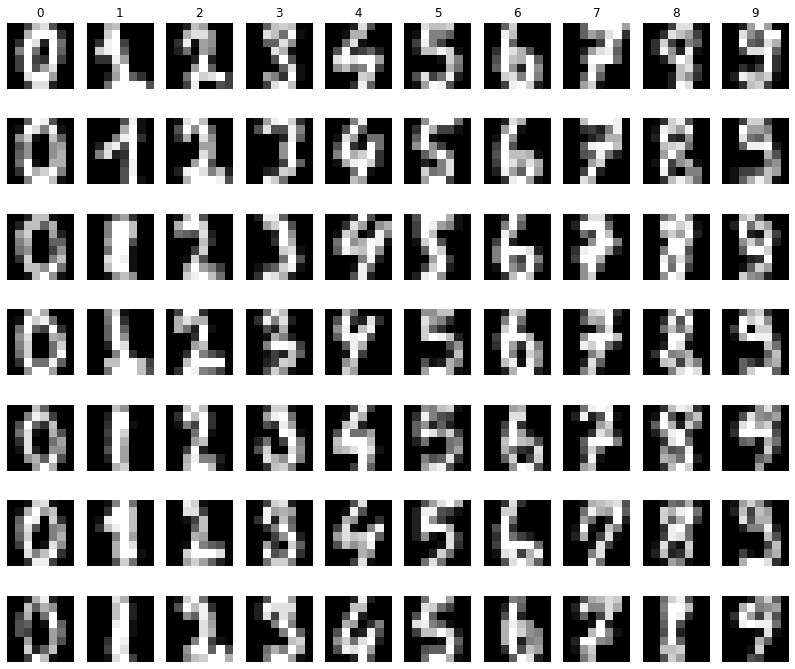

In [7]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
#
#Изобразите немного примеров из базы данных
#Мы покажем несколько примеров обучающих картинок из каждго класса

classes = list(np.arange(10)) #создаем список из 10 элементов
num_classes = len(classes) #кол-во элементов в этом списке
samples_per_class = 7 #кол-во образцов на класс
for y, cls in enumerate(classes): #повторит classes раз
    idxs = np.flatnonzero(y_train == y) #возвращает индексы ненулевых элементов в сжатом до одной оси 
    idxs = np.random.choice(idxs, samples_per_class, replace=False) #Случайная выборка из значений idxs, возвращает массив с кол-вом элементов равным samples_per_class, элементы выборки не повторяются - replace=False .
    for i, idx in enumerate(idxs): #повторит idxs раз
        plt_idx = i * num_classes + y + 1 #цифра, которая будет рисоваться
        plt.subplot(samples_per_class, num_classes, plt_idx) #samples_per_class - столббцов, num_classes - строчек, plt_idx - заполняющий элемент
        plt.imshow(X_train[idx].reshape((8, 8)).astype('uint8')) #рисует картинки размером 8х8
        plt.axis('off') #убирает обоззначения точек, для красоты
        if i == 0: # в 0 строчку(перед всеми картиками)
            plt.title(cls) # пишет какая цифра в столбце
plt.show() #рисует

- Autoreload is a great stuff, but sometimes it does not work as intended. The code below aims to fix than. Do not forget to save your changes in the .py file before reloading the KNearestNeighbor class.
***

***
- Автоперезагрузка это крутой прикол, но иногда он не работает как нужно. Код ниже исправляет это. Не забудьте сохранить ваши изменения в py файле после перезагрузки класса KNearestNeighbor

In [8]:
# This dirty hack might help if the autoreload has failed for some reason
#
#этот грязный хак может поможет если автоперезагрузка по какой-то причине выдала ошибку

try:
    del KNearestNeighbor
except:
    pass

from k_nearest_neighbor import KNearestNeighbor #загружаем класс кнн

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing
#
#Создайтеэкземпляр классификатора кнн 
#помните, что обучение классификатора кнн это циклическая операция
#классификатор просто запоминает данные и в дальнейшем не обрабаотывает

classifier = KNearestNeighbor() #создается экземпляр класса
classifier.fit(X_train, y_train) #обучение экземпляра класса по обучающим данным

* We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps:
***
* First we must compute the distances between all test examples and all train examples.Given these distances, for each test example we find the k nearest examples and have them vote for the label. Lets begin with computing the distance matrix between all training and test examples. For example, if there are Ntr training examples and Nte test examples, this stage should result in a Nte x Ntr matrix where each element (i,j) is the distance between the i-th test and j-th train example.
***
* Note: For the three distance computations that we require you to implement in this notebook, you may not use the np.linalg.norm() function that numpy provides.
***
* First, open k_nearest_neighbor.py and implement the function compute_distances_two_loops that uses a (very inefficient) double loop over all pairs of (test, train) examples and computes the distance matrix one element at a time.
***

***
- Сейчас, мы хотели бы классифицировать тестовые данные благодаря классификатору кнн. Напоминаем что мы можем прервать этот процесс в два шага:
***
- Сначала мы должны вычислить расстояние между всеми тестовыми и всеми обучающими примерами. Учитывая эти расстояния, для каждого тестового примера мы находим k ближайших примеров и заставляем голосовать за метку. Давайте начнем с вычисления матрицы расстояния между всеми обучающими и тестовыми примерами. Например, если есть Ntr обучающиих примеров и Nte тестовых примеров, на этом этапе должна получиться Nte x Ntr матрица, где каждый элемент (i,j) есть дистанция между i-тым тестовым и j-тым обучающим примером.
***
- Примечание: Для трех рассчетов расстояния, которое мы требуем от вас реализовать в этом блокноте, вы не можете использовать np.linalg.norm() 
***
- Сначала откройте k_nearest_neighbor.py и реализуйте функцию compute_distances_two_loops она использует (очень неэффективный) двойной цикл над всеми парами примеров (test, train) и вычисляет матрицу расстояний по одному элементу за раз.

In [9]:
# Open k_nearest_neighbor.py and implement
# compute_distances_two_loops.
#
#Откройте k_nearest_neighbor.py и реализуйте compute_distances_two_loops

# Test your implementation:
#
#проверьте вашу реализацию

dists = classifier.compute_distances_two_loops(X_test) #матрица расстяний, вызывают соответсвующую функцию, принимающую матрицу тестовых данных
print(dists.shape)

(100, 1697)


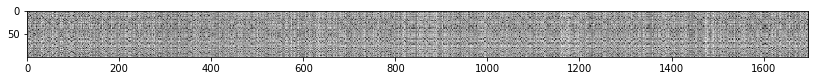

In [11]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
#
#Мы можем показать матрицу расстояний: каждая строка это одиночный тестовыый пример
#и его расстояние до обучающих примеров 

plt.imshow(dists, interpolation='none')
plt.show()

- <font color=“blue”>Inline Question 1
***
- Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)
***
- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?
><font color=“red”>Your answer: fill this in.
***

***
- <font color=“blue”>Вопрос 1
***
- Обратите внимание на структурированные шаблоны в матрице, где некоторые строки или столбцы видны ярче. (обратите внимание, что с обычной цветовой схемой черный указывает на малые расстояния, а белый на большие.) 
***
- Что в данных явяляется причиной четких, ярких строк?
- Что вызывает такие же столбцы?
><font color=“red”>Ваш ответ: 
> - Четкая, яркая строка значит, что тестовое изображение больше похоже на изображения из обучающего набора (если четкие и яркие - это темные строки, если же это белые, то тестовое изображение меньше похоже на обучающие). 
> - Четкие, яркие столбцы значат, что обучающее изображение больше похоже на изображение из тестового набора (если четкие и яркие - это темные строки, если же это белые, то обучающее изображение меньше похоже на тестовые). 

In [15]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
#
#Теперь реализуйте функцию predict_labels и запустите следующий код:
#Мы используем k = 1 (которые есть колв-во ближайших соседей)

y_test_pred = classifier.predict_labels(dists, k=1) #предсказания тестовых данных - записываем в перменную функцию predict_labels из класса кнн, принимает матрицу расстояний

# Compute and print the fraction of correctly predicted examples
#
#Вычислите и напечатайте долю правильных предсказанных примеров

num_correct = np.sum(y_test_pred == y_test) #сравнивает предсказания с тестовыми данными - доля правильных предсказаний примеров
accuracy = float(num_correct) / num_test #точность, проценты
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)) #вывод

Got 95 / 100 correct => accuracy: 0.950000


- You should expect to see approximately 95% accuracy. Now lets try out a larger k, say k = 5:
***

***
- Вы должны ожидать и увидеть примерно 95% точности. Теперь давайте проверим увеличенную k, например k=5  

In [17]:
y_test_pred = classifier.predict_labels(dists, k=5) #предсказания тестовых данных
num_correct = np.sum(y_test_pred == y_test) #сравнивает предсказания с тестовыми данными
accuracy = float(num_correct) / num_test #точность, проценты
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)) #вывод

Got 93 / 100 correct => accuracy: 0.930000


- Accuracy should slightly decrease with k = 5 compared to k = 1.
***

***
- Точноть должна немного уменьшиться с k=5 по сравнению с k=1.
***

***
- <font color=“blue”>Inline Question 2
***
- We can also use other distance metrics such as L1 distance. For pixel values $ p_{ij}^k $ at location $ (i,j) $ of some image $ I_{k} $, the mean $ \mu $ across all pixels over all images is 
$$ \mu=\cfrac{1}{nhw} \sum_{k=1}^{n} \sum_{i=1}^{h} \sum_{j=1}^{w} p_{ij}^k $$
- And the pixel-wise mean $ \mu_{ij} $ across all images is 
$$ \mu_{ij}=\cfrac{1}{n} \sum_{k=1}^n p_{ij}^k $$
- The general standard deviation $ \sigma $ and pixel-wise standard deviation is defined $ \sigma_{ij} $ similarly.
***
- Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
>1. Subtracting the mean $ \mu (\tilde{p}_{ij}^k=p_{ij}^k - \mu) $
>2. Subtracting the per pixel mean $ \mu_{ij} (\tilde{p}_{ij}^k=p_{ij}^k - \mu_{ij}) $
>3. Subtracting the mean $ \mu $ and dividing by the standard deviation $ \sigma $
>4. Subtracting the pixel-wise mean $ \mu_{ij} $ and dividing by the pixel-wise standard deviation $ \sigma_{ij} $
>5. Rotating the coordinate axes of the data.
>> - <font color=“red”>Your answer:
>> - <font color=“red”>Your Explanation:
***

***
- <font color=“blue”>Вопрос 2.
***
- Мы также можем использовать другие расстояние метрик с расстоянием L1. Для значений пикселей $ p_{ij}^k $ в расположении $ (i,j) $ некоторой картинки $ I_{k} $, среднее значение $ \mu $ по всем пикселям через все картинки равно $$ \mu=\cfrac{1}{nhw} \sum_{k=1}^{n} \sum_{i=1}^{h} \sum_{j=1}^{w} p_{ij}^k $$
- И среднее по пикселям значение $ \mu_{ij} $ для всех картинок равно $$ \mu_{ij}=\cfrac{1}{n} \sum_{k=1}^n p_{ij}^k $$
- Общее страндартное отклонение $ \sigma $ и стандартное отклонение по пикселям $ \sigma_{ij} $ определяется аналогично
***
- Какой из следующих шагов предварительной обработки не изменит производительность классификатора ближайших соседей, который использует L1 расстояние? Выберите все, что подходит.
>1. Вычитание среднего $ \mu (\tilde{p}_{ij}^k=p_{ij}^k - \mu) $
>2. Вычитание среднего значения на пиксель $ \mu_{ij} (\tilde{p}_{ij}^k=p_{ij}^k - \mu_{ij}) $
>3. Вычитание среднего $ \mu $ и деление на стандартное отклонение $ \sigma $
>4. Вычитание среднего по пикселям $ \mu_{ij} $ и деление на стандартное отклонение по пикселям $ \sigma_{ij} $
>5. Вращение координатных осей данных
>> - <font color=“red”>Ваш ответ: 
>> -- 1, 3
>> - <font color=“red”>Ваше объяснение: 
>> -- 1 - каждый пиксель будет вычитать одно и то же среднее значение, поэтому l1 не изменится
>> -- 2 - каждый пиксель будет вычитать среднее значение разных пикселей картинки из каждого пикселя из-за этого l1 должен измениться
>> -- 3 - как и в первом варианте ответа, будет вычитаться одно и то же среднее значение, а потом стандартное отклонение, поэтому l1 не изменится
>> -- 4 - как во втором пункте расстояние изменится из-за разных значений
>> -- 5 - /если повернуть все картинки по координатной оси, то количество пикселей у каждой картинки не изменится, поэтому l1 не изменится, но если повернуть одну и сравнивать ее с нормальными, то расстояние поменяется/ мне кажется я не так представляю 


In [18]:
# Now lets speed up distance matrix computation by using partial vectorization
# with one loop. Implement the function compute_distances_one_loop and run the
# code below:
#
#Теперь давайте увеличим скорость вычисления матрицы расстояния, используя 
#частичную векторизацию с одним циклом. Реализуйте функцию 
#compute_distances_one_loop и запустите код ниже:

dists_one = classifier.compute_distances_one_loop(X_test) #вычисляет матрицу расстояний - присваивает переменной функцию compute_distances_one_loop из класса кнн, принимает тестовые данные

# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
#
#Чтобы убедиться что наша векторизованная реализация правильная, мы удостоверимся, что она
#согласуется с наивной реализацией. Есть много путей решить, похожи ли две матрицы;
#один из самый простых - Frobenius norm. В случае если вы не видели это раньше, то  
#Frobenius norm двух матриц - это квадратный корень из квадрата суммы разностей всех 
#элементов; другими словами, изменить форму матрицы в векторы и вычислить
#Euclidean distance между ними.

difference = np.linalg.norm(dists - dists_one, ord='fro') #разница - матрица расстяний(2 цикла) - матрица расстояний (1 цикл)
print('One loop difference was: %f' % (difference, )) #Разница с одним циклом была: 
if difference < 0.001: #если разница меньше 0.001
    print('Good! The distance matrices are the same') #Хорошо! Матрицы расстояний одинаковые
else: #иначе
    print('Uh-oh! The distance matrices are different') # ой-ой! матрицы расстояний разные

One loop difference was: 0.000000
Good! The distance matrices are the same


In [19]:
# Now implement the fully vectorized version inside compute_distances_no_loops
# and run the code
#
#Теперь реализуйте полностью векторизированную версию врнутриcompute_distances_no_loops и запустиет код

dists_two = classifier.compute_distances_no_loops(X_test)

# check that the distance matrix agrees with the one we computed before:
#
#проверьте, что матрица расстояний согласуется с той, которую мы вычислили раньше: 

difference = np.linalg.norm(dists - dists_two, ord='fro') #разница - матрица расстояний(2 цикла) - матрица расстояний (без циклов)
print('No loop difference was: %f' % (difference, )) #разница с матрицой без циклов была:
if difference < 0.001: #если разница меньше 0.001
    print('Good! The distance matrices are the same') #Хорошо! Матрицы расстояний одинаковые
else:#иначе
    print('Uh-oh! The distance matrices are different') # ой-ой! матрицы расстояний разные

No loop difference was: 0.000000
Good! The distance matrices are the same


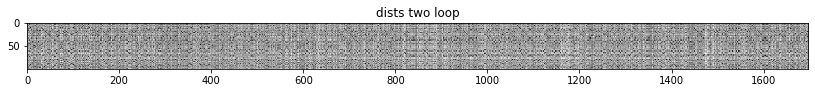

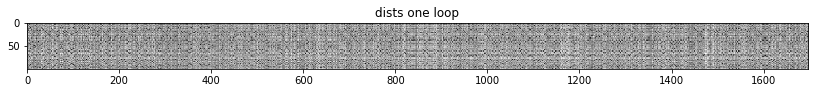

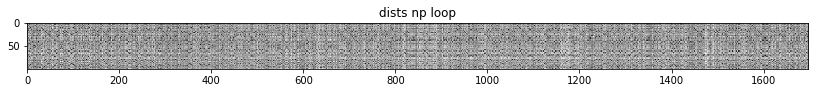

In [27]:
plt.imshow(dists, interpolation='none')
plt.title("dists two loop")
plt.show()

plt.imshow(dists_one, interpolation='none')
plt.title("dists one loop")
plt.show()

plt.imshow(dists_two, interpolation='none')
plt.title("dists np loop")
plt.show()

## Comparing $handcrafted$ and $sklearn$ implementations

## Сравнение $ручных$ и $sklearn$ реализаций

- In this section we will just compare the performance of handcrafted and sklearn kNN algorithms. The predictions should be the same. No need to write any code in this section.
***

***
- В этом раздеое мы просто сравним производительность ручной и склерн кнн алгоритмов. Предсказания должны быть одинаковыми. В этом разделе не нужно писать никакой код.

In [28]:
from sklearn import neighbors #алгоритм реализации кнн в бибилиотеке склерн

In [30]:
implemented_knn = KNearestNeighbor() #экземпляр класса ручной(моей) реализации
implemented_knn.fit(X_train, y_train) #обучение экземпляра класса по обучающим данным

In [32]:
n_neighbors = 1 #кол-во соседей
external_knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors) #создаем экземпляр
external_knn.fit(X_train, y_train) #обучаем этот экземпляр класса по обучающим данным
print('sklearn kNN (k=1) implementation achieves: {} accuracy on the test set'.format(
    external_knn.score(X_test, y_test)
)) #Реализация sklearn kNN (k=1) обеспечивает ___ точность на тестовом наборе (проверка точности по тестовым данным)
y_predicted = implemented_knn.predict(X_test, k=n_neighbors).astype(int) #предсказания по моей реализации 
accuracy_score = sum((y_predicted==y_test).astype(float)) / num_test #опредение точности в сравнении с тестовыми данными
print('Handcrafted kNN (k=1) implementation achieves: {} accuracy on the test set'.format(accuracy_score)) #созданная вручную реализация kNN (k=1) обеспечивает ___ точность на тестовых данных
assert np.array_equal(
    external_knn.predict(X_test),
    y_predicted
), 'Labels predicted by handcrafted and sklearn kNN implementations are different!' #проверяя, является ли заданное условие истинным или ложным, если ложное, то - предсказанные метки отличаются от ручной и sklern релаизации 
print('\nsklearn and handcrafted kNN implementations provide same predictions') #или реализация склерн и ручная дают одинаковые прогнозы
print('_'*76) #полоски для разделения


n_neighbors = 5 #кол-во соседей
external_knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)  #создаем экземпляр
external_knn.fit(X_train, y_train) #обучаем этот экземпляр класса по обучающим данным
print('sklearn kNN (k=5) implementation achieves: {} accuracy on the test set'.format(
    external_knn.score(X_test, y_test)
)) #Реализация sklearn kNN (k=5) обеспечивает ___ точность на тестовом наборе (проверка точности по тестовым данным)
y_predicted = implemented_knn.predict(X_test, k=n_neighbors).astype(int) #предсказания по моей реализации 
accuracy_score = sum((y_predicted==y_test).astype(float)) / num_test #опредение точности в сравнении с тестовыми данными
print('Handcrafted kNN (k=5) implementation achieves: {} accuracy on the test set'.format(accuracy_score)) #созданная вручную реализация kNN (k=5) обеспечивает ___ точность на тестовых данных
assert np.array_equal(
    external_knn.predict(X_test),
    y_predicted
), 'Labels predicted by handcrafted and sklearn kNN implementations are different!'  #проверяя, является ли заданное условие истинным или ложным, если ложное, то - предсказанные метки отличаются от ручной и sklern релаизации 
print('\nsklearn and handcrafted kNN implementations provide same predictions') #или реализация склерн и ручная дают одинаковые прогнозы
print('_'*76)#полоски для разделения

sklearn kNN (k=1) implementation achieves: 0.95 accuracy on the test set
Handcrafted kNN (k=1) implementation achieves: 0.95 accuracy on the test set

sklearn and handcrafted kNN implementations provide same predictions
____________________________________________________________________________
sklearn kNN (k=5) implementation achieves: 0.93 accuracy on the test set
Handcrafted kNN (k=5) implementation achieves: 0.93 accuracy on the test set

sklearn and handcrafted kNN implementations provide same predictions
____________________________________________________________________________


## Measuring the time

- Finally let's compare how fast the implementations are.
- To make the difference more noticable, let's repeat the train and test objects (there is no point but to compute the distance between more pairs).
***

***
- В окончание давайте сравним, как быстры реализации
- Чтобы сделать разницу более заметной, давайте повторим обучение и тестирование объектов (в этом нет смысла, кроме вычислиения расстояния между парами)

In [35]:
X_train_big = np.vstack([X_train]*5) #пихает в один массив, по вертикали, обучающие данные(цифры массивами) 5 раз
X_test_big = np.vstack([X_test]*5) #пихает в один массив, по вертикали, тестовые данные(цифры массивами) 5 раз
y_train_big = np.hstack([y_train]*5) #пихает в один массив, по горизонтали, обучающие данные(просто цифры) 5 раз
y_test_big = np.hstack([y_test]*5) #пихает в один массив, по горизонтали, тестовые данные(просто цифры) 5 раз

In [38]:
classifier_big = KNearestNeighbor() # создаем новый экземпляр класса
classifier_big.fit(X_train_big, y_train_big) #Чтобы сделать разницу более заметной, давайте повторим обучение и тестирование объектов
# Let's compare how fast the implementations are
#
#Дававйте сравним как бытро они реализовались

def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    #Вызовите функцию f с аргументами и верните время в секундах это нужно для выполнения
    
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

#вычисление затраченного времени с помощью функции выше

two_loop_time = time_function(classifier_big.compute_distances_two_loops, X_test_big)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier_big.compute_distances_one_loop, X_test_big)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier_big.compute_distances_no_loops, X_test_big)
print('No loop version took %f seconds' % no_loop_time)

# You should see significantly faster performance with the fully vectorized implementation!
#
# ВЫ должны увидеть более бытрую производительность с полной векторизированной реализацией

# NOTE: depending on what machine you're using, 
# you might not see a speedup when you go from two loops to one loop, 
# and might even see a slow-down.
#
#заметка: в зависимости от того, какой машиной вы пользуютесь
#вы можете не заметить повышение скорости, когда идете от двух циклов к одному
#и можете даже увидеть понижение скорости

Two loop version took 47.988975 seconds
One loop version took 2.632716 seconds
No loop version took 2.620189 seconds


- The improvement seems significant. (On some hardware one loop version may take even more time, than two loop, but no loop should definitely be the fastest.
***

***
- Улучшение кажется значимым. (На некоторых аппаратных - версия с одним циклом может затратить даже больше времени, чем версия с двумя циклами, но ни один цик не должен быть самым быстрым.)
***

***
 - <font color=“blue”>Inline Question 3
***
 - Which of the following statements about K-Nearest Neighbor (K-NN) are true in a classification setting, and for all K? Select all that apply.
>1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
>2. The training error of a 1-NN will always be lower than that of 5-NN.
>3. The test error of a 1-NN will always be lower than that of a 5-NN.
>4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
>5. None of the above.
>> - <font color=“red”>Your Answer:
>> - <font color=“red”>Your Explanation:

***
 - <font color=“blue”>Вопрос 3
***
 - Какие из следующих устверждений о кнн верны в найстройках кссификации и для сех к? Выберете все, что подходит.
 >1. Граница решения (гиперплоскость между классами в пространстве признаков) классификатора кнн является линейной
 >2. Ошибка обучения с 1 соседом будет всегда ниже, чем у 5 соседей
 >3. Ошибка теста с 1 соседом всегда будет ниже чем у 5 соседей
 >4. Время, нужное для классификации тестовых примеров с помощью классификатора кнн, увеличивается с размером обучающего набора.  
 >5. Ни один из тех, что выше.
 >> - <font color=“red”>Ваш ответ:
 >> -- 4
 >> - <font color=“red”>Ваше объяснение: 
 >> -- 1 - граница решения не линейная, так как она вычисляет расстояяние до вершины
 >> -- 2 - когда один сосед, то он смотрит только на одну точку, поэтому в обучении нет ошибки, а когда 5 соседей, то проискодит голосование, гже будут разны еошибки
 >> -- 3 - также как 2
 >> -- 4 - больше данных - занимает больше времени для обучения